In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__


TensorFlow 2.x selected.


'2.2.0-rc2'

In [0]:
!pip install ktrain

     |████████████████████████████████| 25.2MB 127kB/s 
     |████████████████████████████████| 983kB 58.5MB/s 
     |████████████████████████████████| 245kB 72.6MB/s 
     |████████████████████████████████| 552kB 67.7MB/s 
     |████████████████████████████████| 870kB 65.8MB/s 
     |████████████████████████████████| 3.7MB 20.4MB/s 
     |████████████████████████████████| 1.0MB 49.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.12.2-cp36-none-any.whl size=25228412 sha256=6a3a9b0d3835e9d1703b25996050b7af7864040019b48fd30db73212eec36e4b
  Stored in directory: /root/.cache/pip/wheels/8c/79/14/c0d31211285b61f43f46a8ca87e85997316b8fc6f3aaa00131
  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=7ceebab6908b98aa24622b29998a0a902610e20de17da167db8e46dc370cff8f
  Stored in directory: /root/.cache/pip/wheels/bd/27/da/ffc2d573aa48b87440ec4f98bc7c992e3a2d899edb2d22ef9e
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl siz

In [0]:
#libraries 
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text

In [0]:
import pandas as pd
df = pd.read_csv("malay_chinese_indian_consumer.csv")
df[['Name','Race' ]].head()

,Name,Race
0,siti nurfaizah binti hadjimuddin,Malay
1,Nuraini Noor Hisham,Malay
2,mohd fadzil bin alias,Malay
3,Syed Fahmi Syed Shahrom,Malay
4,MOHD RAZI BIN MAT SALLEH,Malay


In [0]:
#prepare test and train dataset 
df =df[['Name','Race']].dropna()

# New Section

In [0]:
set(df['Race'])

{'Chinese', 'Indian', 'Malay', 'Others'}

In [0]:
category_type = ['Chinese', 'Indian', 'Malay', 'Others']
category_type.sort()
print(category_type)
# mapping of the categories
category_map = {'Chinese':0, 'Indian':1, 'Malay':2, 'Others':3}

df['race_map']= df['Race'].map(category_map)

['Chinese', 'Indian', 'Malay', 'Others']


In [0]:
df

,Name,Race,race_map
0,siti nurfaizah binti hadjimuddin,Malay,2
1,Nuraini Noor Hisham,Malay,2
2,mohd fadzil bin alias,Malay,2
3,Syed Fahmi Syed Shahrom,Malay,2
4,MOHD RAZI BIN MAT SALLEH,Malay,2
...,...,...,...
394,Omar Kunju maidin,Others,3
395,Renny Rachmawati,Others,3
396,Ali Kazerouni,Others,3
397,Mabina Renovation,Others,3


In [0]:

category_df_list = df['race_map'].tolist()
summary_df_list = df['Name'].tolist()

In [0]:
x_train, x_test, y_train, y_test = train_test_split( summary_df_list,
                                                    category_df_list, test_size=0.33, random_state=42)

trn, val, preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                          x_test=x_test, y_test=y_test,
                                          class_names=category_type,
                                          preprocess_mode='distilbert',
                                          maxlen=350)

task: text classification



preprocessing train...
language: en
train sequence lengths:
	mean : 2
	95percentile : 4
	99percentile : 5


preprocessing test...
language: en
test sequence lengths:
	mean : 2
	95percentile : 4
	99percentile : 5


In [0]:
model = text.text_classifier('distilbert', train_data=trn, preproc=preproc)
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)


Is Multi-Label? False
maxlen is 350



done.


simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.6/dist-packages/ktrain/core.py:449: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  'If you wish to estimate LR using more epochs, set max_epochs manually.')


Train for 44 steps
Epoch 1/5
44/44 [==============================] - 21s 485ms/step - loss: 3.2216e-04 - accuracy: 1.0000
Epoch 2/5
44/44 [==============================] - 21s 477ms/step - loss: 3.3494e-04 - accuracy: 1.0000
Epoch 3/5
44/44 [==============================] - 21s 476ms/step - loss: 2.4175e-04 - accuracy: 1.0000
Epoch 4/5
35/44 [======================>.......] - ETA: 4s - loss: 0.0134 - accuracy: 0.9952    

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


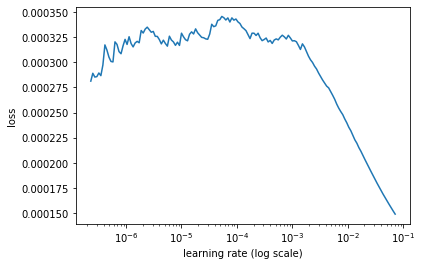

In [0]:
# find a good learning rate
  # learner.lr_find()
  # learner.lr_plot()

In [0]:
# train the model 

learner.fit_onecycle(3e-4, 10)



begin training using onecycle policy with max lr of 0.0003...
Epoch 1/10
45/45 [==============================] - 17s 374ms/step - loss: 0.1675 - accuracy: 0.9625 - val_loss: 1.3342 - val_accuracy: 0.8106
Epoch 2/10
45/45 [==============================] - 17s 375ms/step - loss: 0.1192 - accuracy: 0.9663 - val_loss: 1.4961 - val_accuracy: 0.8106
Epoch 3/10
45/45 [==============================] - 17s 375ms/step - loss: 0.1405 - accuracy: 0.9700 - val_loss: 1.7717 - val_accuracy: 0.7500
Epoch 4/10
45/45 [==============================] - 17s 375ms/step - loss: 0.2069 - accuracy: 0.9438 - val_loss: 1.3420 - val_accuracy: 0.7879
Epoch 5/10
45/45 [==============================] - 17s 374ms/step - loss: 0.1170 - accuracy: 0.9738 - val_loss: 1.4517 - val_accuracy: 0.7955
Epoch 6/10
45/45 [==============================] - 17s 374ms/step - loss: 0.2079 - accuracy: 0.9551 - val_loss: 1.2995 - val_accuracy: 0.8258
Epoch 7/10
45/45 [==============================] - 17s 376ms/step - loss: 0.1

In [0]:
#predict the race from the names
p = ktrain.get_predictor(model, preproc)
p.predict(['kamal logan',])

['Indian']

In [0]:
p.predict(['Cristiano Ronaldo'])

['Others']

In [0]:
p.predict(['Edmund cheah'])

['Chinese']

In [0]:
p.predict(['Shardul Srivastava']) 

['Indian']

In [0]:
p.predict(['Nazmi asri '])

['Malay']

In [0]:
p.predict(['Kong Chien Lai'])

['Chinese']

In [0]:
p.predict(['Sabino Da Silva'])

['Others']

In [0]:
coronavirus symptom

['Others']

In [0]:
p.predict(['Nor Izura'])

['Malay']

CRM use case development

In [0]:
bumi_df = pd.read_csv("bumi_list.csv", sep=';')
bumi_df.head()
print(bumi_df.shape)
print(list(bumi_df))

(111631, 5)
['user_id', 'First Name', 'Last Name', 'Email', 'Company']


In [0]:
# first10k_bumi_df = bumi_df[:10000]

print(bumi_df.shape)
bumi_df_drop_na = bumi_df[(bumi_df['First Name'].notnull())]
print(bumi_df_drop_na.shape)

(111631, 5)
(69035, 5)


In [0]:
first10k_bumi_df_names =[]
temp_bumi_df = pd.DataFrame(bumi_df_drop_na[['user_id', 'First Name', 'Last Name', 'Email']])
# 10_temp_bumi_df = temp_bumi_df[:10]
for index, item in temp_bumi_df.iterrows():
  # consumers_name_len = int(len(str(item['Name']).strip().split(" ")))
  # temp_bumi_df.loc[index, 'name_length'] = consumers_name_len
  full_name  = str(item['First Name'])+ ' '+ str(item['Last Name'])
  temp_bumi_df.loc[index, 'full_name'] = full_name
  # predicted_race = p.predict(full_name)
  # temp_bumi_df.loc[index, 'predicted_race'] = predicted_race
  first10k_bumi_df_names.append(full_name)

In [0]:
# first10k_bumi_df_names

predicted_race = p.predict(first10k_bumi_df_names)

In [0]:

predicted_race = p.predict(first10k_bumi_df_names)
temp_bumi_df['Race'] = predicted_race
temp_bumi_df['First Name'].dropna
json_dump = []
for jdict in temp_bumi_df.to_dict(orient='records'):
  json_dump.append(jdict)
#   print(jdict)

with open('json_data.txt', 'w') as outfile:
    json.dump(json_dump, outfile)

# files.download('json_data.txt')

In [0]:
import json 
temp_bumi_df = pd.DataFrame(first10k_bumi_df[['user_id', 'First Name', 'Last Name', 'Email']])
# 10_temp_bumi_df = temp_bumi_df[:10]
for index, item in temp_bumi_df.iterrows():
  # consumers_name_len = int(len(str(item['Name']).strip().split(" ")))
  # temp_bumi_df.loc[index, 'name_length'] = consumers_name_len
  full_name  = str(item['First Name'])+ ' '+ str(item['Last Name'])
  temp_bumi_df.loc[index, 'full_name'] = full_name
  predicted_race = p.predict(full_name)
  temp_bumi_df.loc[index, 'predicted_race'] = predicted_race
  # print(f'predicted_race : {predicted_race} of name: {full_name}')
  # print(temp_bumi_df)
  # break

# temp_bumi_df.head()

# import numpy as np
# from google.colab import files

# json_dump = []
# # df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
# for jdict in temp_bumi_df.to_dict(orient='records'):
#   json_dump.append(jdict)
# #   print(jdict)

# with open('json_data.txt', 'w') as outfile:
#     json.dump(json_dump, outfile)

# files.download('json_data.txt')


MessageError: ignored

In [0]:
with open('json_data.txt') as json_file:
    data = json.load(json_file)
    # for item in data:
    #   print(item)
    #   break

data[0].split("\n")[0]

'user_id                              2817'

In [0]:
from google.colab import files
files.download('json_data.txt')

## Filter the names with less than two part of it. 

In [0]:
import pandas as pd
df = pd.read_csv("malay_chinese_indian_consumer.csv")
df.head()

temp_df = pd.DataFrame(df[['Name', 'Race']])
for index, item in temp_df.iterrows():
  consumers_name_len = int(len(str(item['Name']).strip().split(" ")))
  temp_df.loc[index, 'name_length'] = consumers_name_len

temp_df.head()

,Name,Race,name_length
0,siti nurfaizah binti hadjimuddin,Malay,4.0
1,Nuraini Noor Hisham,Malay,3.0
2,mohd fadzil bin alias,Malay,4.0
3,Syed Fahmi Syed Shahrom,Malay,4.0
4,MOHD RAZI BIN MAT SALLEH,Malay,5.0


In [0]:
!pip freeze | grep pandas

pandas==1.0.3
pandas-datareader==0.7.4
pandas-gbq==0.11.0
pandas-profiling==1.4.1
sklearn-pandas==1.8.0
